# Datahugger - Example research Jupyter Notebook

This notebook shows how the tool Datahugger can be used in everyday research analyses. Find some additional tips on the bottom of this page. We assume that you published your data somewhere in a data repository supported by Datahugger or you are reusing someone else data from data repository supported by Datahugger. 

In this notebook, we are reproducing results of the paper *[Telemeco, Rory S., et al. "Reptile embryos lack the opportunity to thermoregulate by moving within the egg." The American Naturalist 188.1 (2016): E13-E27.](https://doi.org/10.1086/686628)*. The data can be found behind this DOI: [10.5061/dryad.mj8m0](https://doi.org/10.5061/dryad.mj8m0).

Import the Python dependencies for this study.

In [1]:
# import your research specific Python packages, e.g. pandas and seaborn
import pandas as pd
import seaborn as sns

# use `!pip install datahugger` if not available
import datahugger

## Data

Data for this study can be found on [10.5061/dryad.mj8m0](https://doi.org/10.5061/dryad.mj8m0). 

Lets get the data and save it in the folder `"data"`. As there is one large file we don't need (`SoilSimulation_Output.csv`), we skip the large file by setting the max file size to 1MB. 

In [2]:
dh = datahugger.get("10.5061/dryad.mj8m0", "data", max_file_size=1000000)

NestTemperatureData.csv            : 100%|██████████████████████| 607k/607k [00:00<00:00, 730kB/s]
README_for_NestTemperatureData.txt : 100%|████████████████████| 2.82k/2.82k [00:00<00:00, 740kB/s]
ExternalTemps.csv                  : 100%|████████████████████| 1.06k/1.06k [00:00<00:00, 288kB/s]
README_for_ExternalTemps.txt       : 100%|████████████████████| 2.82k/2.82k [00:00<00:00, 963kB/s]
InternalEggTempData.csv            : 100%|████████████████████████| 664/664 [00:00<00:00, 130kB/s]
README_for_InternalEggTempData.txt : 100%|████████████████████| 2.82k/2.82k [00:00<00:00, 668kB/s]


SoilSimulation_Output.csv          : SKIPPED


README_for_SoilSimulation_[...].txt: 100%|████████████████████| 2.82k/2.82k [00:00<00:00, 957kB/s]


Results are now downloaded and available in the file system. You can easily see the content of the folder.

In [3]:
dh.tree()

data/
├── README_for_ExternalTemps.txt
├── README_for_InternalEggTempData.txt
├── README_for_NestTemperatureData.txt
├── README_for_SoilSimulation_Output.txt
├── ExternalTemps.csv
├── InternalEggTempData.csv
└── NestTemperatureData.csv

0 directories, 7 files
README Data Code


## Load data

From here on, there are no difference compared to a normal analysis. 

Read the data into a pandas DataFrame. 

In [4]:
df_nest = pd.read_csv("data/NestTemperatureData.csv")
df_nest.head()

,Nest,Depth,Hour,TimePoint,Temp
0,Nest 5,1,1,1,22.0
1,Nest 2,1,1,1,22.5
2,Nest 3,1,1,1,23.5
3,Nest 4,1,1,1,23.5
4,Nest 1,1,1,1,22.0


## Create plots

In this notebook, we aim to reproduce the plots of the orginal paper. See https://core.ac.uk/download/pdf/128974591.pdf figure 1. 

In [5]:
df_nest["Position in nest"] = df_nest["Depth"].replace({
    1: "Top", 
    2: "Upper middle", 
    3: "Lower middle", 
    4: "Bottom"
})

[Text(0.5, 0, 'Hour of the day'), Text(0, 0.5, 'Temperature in C')]

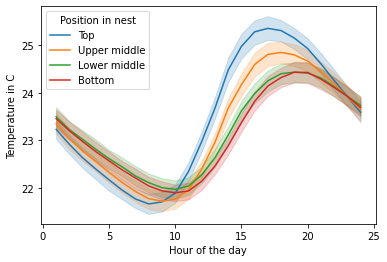

In [6]:
g = sns.lineplot(data=df_nest, y="Temp", x="Hour", hue="Position in nest")
g.set(xlabel="Hour of the day", ylabel="Temperature in C")

This is identical to the result in the original paper.

![Figure 1 of paper](https://www.journals.uchicago.edu/cms/10.1086/686628/asset/images/medium/fg1.gif)

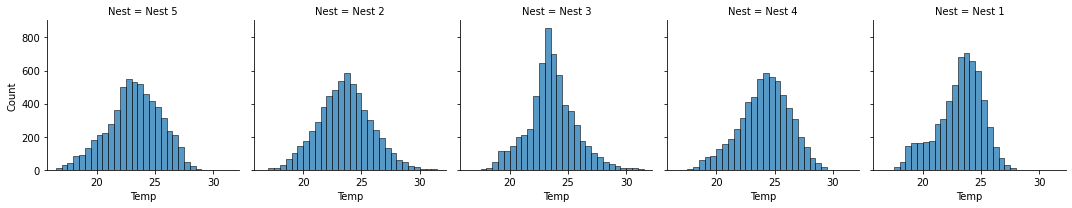

In [7]:
sns.displot(
    df_nest, x="Temp", col="Nest",
    binwidth=0.5, height=3, facet_kws=dict(margin_titles=True),
)

## Checklist for datahugger 

The following Datahugger tips and tricks can help you to find an optimal workflow. 

- [ ] Dont forget to add datahugger to your installation instructions or requirements.txt.
- [ ] Dont republish the dataset, you only have to share your notebook with your peers to get the exact result.

Using git?

- [ ] Add your data output folder (in this example "data") to your `.gitignore` file. In this way, you prevent adding all data to your git history. 
- [ ] The progress bars of datahugger can very every time you download the dataset. If this causes unintended changes to your git history, use `progress=False`. 
